# Import Packages

- First, let's run the cell below to import packages and the last cell with [Helper Functions](#helper).
- Back from Helper Function
<a id='helper_back'></a>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

## Import Data

In [108]:
Name = ["Depth(ft)","TOC(%wt)","K(%Vol)","HI(mg/g OC)","Rho (g/cm3)","Porosity (%)",
        "Vp_0(km/s)","Vp_45(km/s)","Vp_90(km/s)",
        "Vsh_0(km/s)","Vsh_45(km/s)","Vsh_90(km/s)",
        "Vsv_0(km/s)","Vsv_45(km/s)","Vsv_90(km/s)"]
datalist1=[]; datalist2=[] 
with open("vernikTable1.dat",'r') as f:
    count = 0
    for line in f:
        count += 1
        if count > 7:
            line = line.strip(); line = line.strip('\t')
            line = line.strip('\n'); line = line.split()
            numbers = [ float(x) for x in line ]
            datalist1.append(numbers)
with open("vernikTable2.dat",'r') as f:
    count = 0
    for line in f:
        count += 1
        if count > 8:
            line = line.strip(); line = line.strip('\t')
            line = line.strip('\n'); line = line.split()
            numbers = [ float(x) for x in line ]
            datalist2.append(numbers)
Data = np.hstack((np.array(datalist1),np.array(datalist2)[:,1:]))
Depth = Data[:,0]; TOC = Data[:,1]; K = Data[:,2]
HI = Data[:,3]; Rho = Data[:,4]; Porosity = Data[:,5]
Vp_0 =Data[:,6]; Vp_45=Data[:,7]; Vp_90=Data[:,8]
Vsh_0=Data[:,9]; Vsh_45=Data[:,10]; Vsh_90=Data[:,11]
Vsv_0=Data[:,12]; Vsv_45=Data[:,13]; Vsv_90=Data[:,14]
dataframe = pd.DataFrame(Data, columns = Name)
dataframe

,Depth(ft),TOC(%wt),K(%Vol),HI(mg/g OC),Rho (g/cm3),Porosity (%),Vp_0(km/s),Vp_45(km/s),Vp_90(km/s),Vsh_0(km/s),Vsh_45(km/s),Vsh_90(km/s),Vsv_0(km/s),Vsv_45(km/s),Vsv_90(km/s)
0,7570.0,16.2,37.5,569.0,2.09,1.97,3.13,-1.00,3.94,1.88,-1.00,2.30,1.87,-1.00,1.87
1,8630.0,20.1,44.5,584.0,1.99,-1.00,3.32,3.82,3.93,2.03,2.35,2.31,2.20,2.26,2.05
2,8634.0,15.9,36.5,493.0,2.06,0.65,3.02,3.44,4.14,1.76,2.09,2.50,1.76,1.99,1.79
3,9831.0,10.3,25.0,420.0,2.21,-1.00,3.41,3.73,4.16,2.07,2.51,2.31,2.07,2.18,2.02
4,10164.0,12.9,27.3,319.0,2.22,0.68,3.38,3.66,4.19,2.12,2.35,2.57,2.12,2.22,2.12
5,10487.0,15.4,31.9,346.0,2.18,-1.00,3.18,-1.00,4.20,1.94,-1.00,2.51,1.93,-1.00,1.92
6,10495.0,9.8,21.4,325.0,2.30,-1.00,3.62,-1.00,4.36,2.22,-1.00,2.63,2.22,-1.00,2.24
7,10575.0,10.1,20.4,294.0,2.49,0.75,3.36,-1.00,4.48,2.06,-1.00,2.55,2.05,-1.00,2.05
8,10732.0,7.6,17.5,180.0,2.43,-1.00,4.03,4.33,4.61,2.51,2.61,2.71,2.50,2.62,2.16
9,10733.0,12.0,26.4,145.0,2.33,-1.00,3.46,3.86,4.49,2.00,2.33,2.62,1.99,2.13,2.02


### (a)

In [156]:
vp1 = 5200; vs1 = 2700; rho1 = 2450; h1 = 0.75
vp2 = 2900; vs2 = 1400; rho2 = 2340; h2 = 0.5
A, B, C, D, F, M = backus_average(vp1, vs1, rho1, h1, vp2, vs2, rho2, h2)
print('A: '+str(round(A*1e-9,2))+'GPa') 
print('B: '+str(round(B*1e-9,2))+'GPa')
print('C: '+str(round(C*1e-9,2))+'GPa')
print('D: '+str(round(D*1e-9,2))+'GPa')
print('F: '+str(round(F*1e-9,2))+'GPa')
print('M: '+str(round(M*1e-9,2))+'GPa')

A: 45.11GPa
B: 20.01GPa
C: 34.03GPa
D: 8.28GPa
F: 16.68GPa
M: 12.55GPa


### (b)

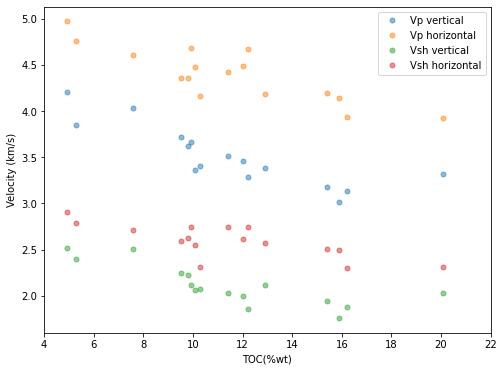

In [115]:
fig, axs = plt.subplots(1,1, figsize=(8, 6))
axs.plot(TOC, Vp_0, '.',markersize=10, alpha=0.5, label='Vp vertical')
axs.plot(TOC, Vp_90, '.',markersize=10,  alpha=0.5, label='Vp horizontal')
axs.plot(TOC, Vsh_0, '.',markersize=10,  alpha=0.5, label='Vsh vertical')
axs.plot(TOC, Vsh_90, '.',markersize=10,  alpha=0.5, label='Vsh horizontal')
axs.legend(loc='upper right',fontsize=10, shadow=False)
axs.set_xlim(4, 22)
axs.set_xlabel('TOC(%wt)') 
axs.set_ylabel('Velocity (km/s)')
fig.savefig('./p3-b.pdf', dpi=800, format='pdf')

### (c)

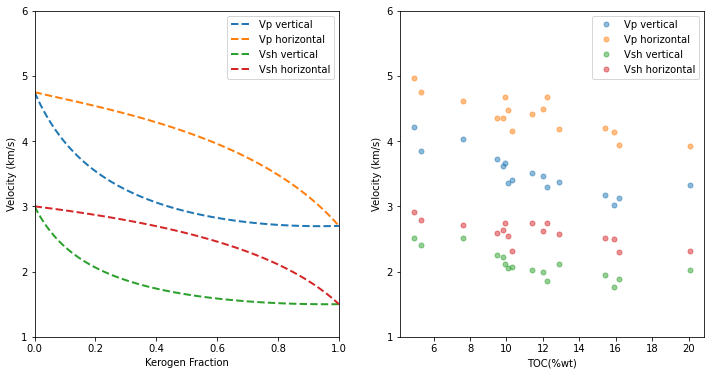

In [161]:
vp_k = 2700; vs_k = 1500; rho_k = 1400
vp_nk = 4750; vs_nk = 3000; rho_nk = 2700
k = 1
fk = np.linspace(0,1, num=100) #  kerogen fraction
vp_vert=[]
vp_horiz=[]
vsh_vert=[]
vsh_horiz=[]
for i in fk:
    h1 = i
    h2 = 1-h1
    rho = h1/(h1+h2)*rho_k + h2/(h1+h2)*rho_nk
    A, B, C, D, F, M = backus_average(vp_k, vs_k, rho_k, h1, vp_nk, vs_nk, rho_nk, h2)  
    vp_vert.append(np.power(C/rho,1/2)/1000)
    vp_horiz.append(np.power(A/rho,1/2)/1000)
    vsh_vert.append(np.power(D/rho,1/2)/1000)
    vsh_horiz.append(np.power(M/rho,1/2)/1000)

vp_vert = np.array(vp_vert)
vp_horiz = np.array(vp_horiz)
vsh_vert = np.array(vsh_vert)
vsh_horiz = np.array(vsh_horiz)

fig, axs = plt.subplots(1,2, figsize=(12, 6))
axs[0].plot(fk, vp_vert, linestyle='--', linewidth=2, alpha=1, label='Vp vertical')
axs[0].plot(fk, vp_horiz, linestyle='--', linewidth=2, alpha=1, label='Vp horizontal')
axs[0].plot(fk, vsh_vert, linestyle='--', linewidth=2, alpha=1, label='Vsh vertical')
axs[0].plot(fk, vsh_horiz, linestyle='--', linewidth=2, alpha=1, label='Vsh horizontal')
axs[0].legend(loc='upper right',fontsize=10, shadow=False) 
axs[0].set_xlim(0,1)
axs[0].set_ylim(1,6)
axs[0].set_xlabel('Kerogen Fraction') 
axs[0].set_ylabel('Velocity (km/s)')

axs[1].plot(TOC, Vp_0, '.',markersize=10, alpha=0.5, label='Vp vertical')
axs[1].plot(TOC, Vp_90, '.',markersize=10,  alpha=0.5, label='Vp horizontal')
axs[1].plot(TOC, Vsh_0, '.',markersize=10,  alpha=0.5, label='Vsh vertical')
axs[1].plot(TOC, Vsh_90, '.',markersize=10,  alpha=0.5, label='Vsh horizontal')
axs[1].legend(loc='upper right',fontsize=10, shadow=False) 
# axs[1].set_xlim(0,1)
axs[1].set_ylim(1,6)
axs[1].set_xlabel('TOC(%wt)') 
axs[1].set_ylabel('Velocity (km/s)')
fig.savefig('./p3-c.pdf', dpi=800, format='pdf')

### (d)

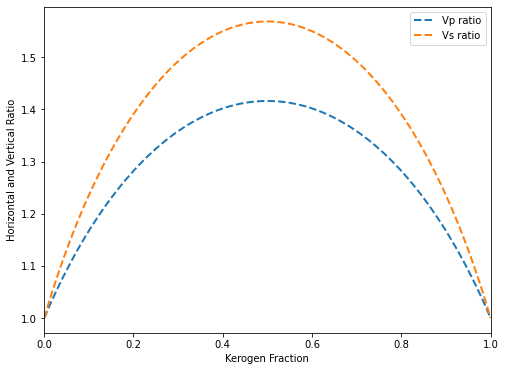

In [164]:
vp_ratio = vp_horiz/vp_vert
vs_ratio = vsh_horiz/vsh_vert

fig, axs = plt.subplots(1,1, figsize=(8, 6))
axs.plot(fk, vp_ratio, linestyle='--', linewidth=2, alpha=1,  label='Vp ratio')
axs.plot(fk, vs_ratio, linestyle='--', linewidth=2, alpha=1,  label='Vs ratio')
axs.legend(loc='upper right',fontsize=10, shadow=False)
axs.set_xlabel('Kerogen Fraction') 
axs.set_ylabel('Horizontal and Vertical Ratio')
axs.set_xlim(0,1)
fig.savefig('./p3-d.pdf', dpi=800, format='pdf')

## Helper Functions
<a id='helper'></a>

In [135]:
def backus_average(vp1, vs1, rho1, h1, vp2, vs2, rho2, h2):
    f1 = h1/(h1+h2)
    f2 = h2/(h1+h2)
    A = f1*4*rho1*vs1**2*(1 - vs1**2/vp1**2) \
        + (f2*4*rho2*vs2**2) * (1-(vs2**2/vp2**2)) \
        + ((f1*(1-(2*vs1**2/vp1**2)) + f2*(1-(2*vs2**2/vp2**2)))**2 * (1/((f1/(rho1*vp1**2)) + (f2/(rho2*vp2**2)))))
    C = 1 / ((f1/(rho1*vp1**2)) + (f2/(rho2*vp2**2)))
    D = 1 / ((f1/(rho1*vs1**2)) + (f2/(rho2*vs2**2)))
    F = (f1*(1-(2*vs1**2/vp1**2)) + f2*(1-(2*vs2**2/vp2**2))) * (1/((f1/(rho1*vp1**2))+(f2/(rho2*vp2**2))))
    M = f1*rho1*vs1**2 + f2*rho2*vs2**2
    B = A - 2*M
    
    return A, B, C, D, F, M


-[Turn back!](#helper_back)